# CEE 690, Lecture 14 Code Examples

This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

This is a partial set of codes to look at the last couple of lectures.  There is _a lot_ of things that we cover recently.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "14"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory didn't exist, creating now.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf',transparent=True)

## Cross-Validation
Previously we talked about using a validation dataset.  Instead, we may want to use many validation datasets instead of a single one.  This can be done through cross-validation.

First, let's load in a dataset.

In [7]:
from sklearn import datasets,model_selection
diabetes=datasets.load_diabetes(return_X_y=False)

For the purposes of this discussion, we are going to make a big assumption that we have true "test" set reserved elsewhere and are only going to work on validation.

In [8]:
X=diabetes['data']
y=diabetes['target']

Before, we simply used a single split:

In [9]:
# Import relevant functions
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [10]:
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X,y,random_state=42)

In [11]:
# Compute paths

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
mse_train=np.zeros(alphas.shape)
mse_valid=np.zeros(alphas.shape)
for i,a in enumerate(alphas):
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    mse_train[i]=mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train))
    mse_valid[i]=mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid))

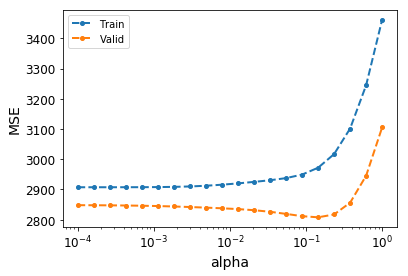

In [12]:
fig=plt.figure(figsize=[6,4])
plt.plot(alphas,mse_train,'.--',lw=2,ms=8,label='Train')
plt.plot(alphas,mse_valid,'.--',lw=2,ms=8,label='Valid')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

A very surprising thing happens here, our model works _better_ on our validation dataset than it does on the training data.  This is simply a function of the random split of the data.  Consider a different random split.

In [13]:
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X,y,random_state=24)

In [14]:
# Compute paths

n_alphas = 20
alphas = np.logspace(-3, 0, n_alphas)
mse_train=np.zeros(alphas.shape)
mse_valid=np.zeros(alphas.shape)
for i,a in enumerate(alphas):
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    mse_train[i]=mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train))
    mse_valid[i]=mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid))

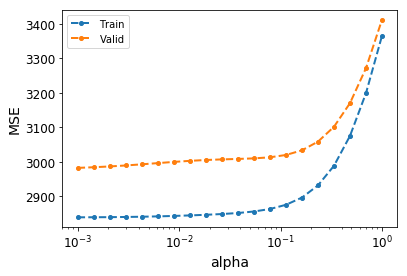

In [15]:
fig=plt.figure(figsize=[6,4])
plt.plot(alphas,mse_train,'.--',lw=2,ms=8,label='Train')
plt.plot(alphas,mse_valid,'.--',lw=2,ms=8,label='Valid')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

On that random split, the validation is worse than the training dataset, as expected.  Our performance estimates are quite different depending on which random split we look at, and our optimal $\alpha$ is quite different dependending on which split of the data that we look at.

One approach is to keep _rotating_ our data so that we try each data point as a validation sample at some point.  This is called cross-validation, and is very common.  Scikit-learn has built in techniques to help address this issue.

In [16]:
kfoldcv=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)

In [17]:
for train_index, valid_index in kfoldcv.split(X,y):
    print("Index Numbers:","TRAIN:", train_index[:10],'...', "VALID:", valid_index[:10],'...')
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

Index Numbers: TRAIN: [ 1  2  3  4  5  6  7  8 10 12] ... VALID: [ 0  9 11 15 19 22 24 25 30 33] ...
Index Numbers: TRAIN: [ 0  1  2  4  6  8  9 10 11 12] ... VALID: [ 3  5  7 16 17 18 26 29 31 36] ...
Index Numbers: TRAIN: [ 0  1  3  4  5  7  8  9 11 12] ... VALID: [ 2  6 10 23 37 38 59 67 68 69] ...
Index Numbers: TRAIN: [ 0  1  2  3  5  6  7  9 10 11] ... VALID: [ 4  8 12 14 27 28 32 35 40 41] ...
Index Numbers: TRAIN: [ 0  2  3  4  5  6  7  8  9 10] ... VALID: [ 1 13 20 21 34 43 48 49 50 52] ...


In [18]:
# Compute paths
n_folds =5 
n_alphas = 20
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)
alphas = np.logspace(-4, 0, n_alphas)
mse_train=np.zeros([n_folds,n_alphas])
mse_valid=np.zeros([n_folds,n_alphas])
i=0
for train_index, valid_index in kfoldcv.split(X,y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    for j,a in enumerate(alphas):
        ridge=linear_model.Ridge(alpha=a)
        ridge.fit(X_train, y_train)
        mse_train[i,j]=mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train))
        mse_valid[i,j]=mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid))
    i+=1

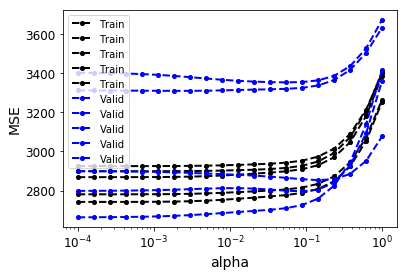

In [19]:
fig=plt.figure(figsize=[6,4])
plt.plot(alphas,mse_train.T,'k.--',lw=2,ms=8,label='Train')
plt.plot(alphas,mse_valid.T,'b.--',lw=2,ms=8,label='Valid')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

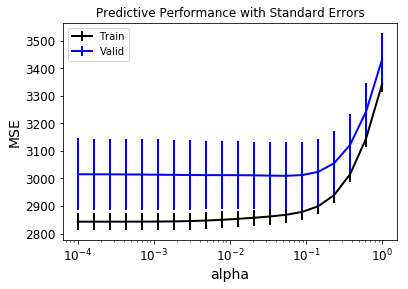

In [20]:
fig=plt.figure(figsize=[6,4])
plt.errorbar(alphas,np.mean(mse_train,axis=0),np.std(mse_train,axis=0)/np.sqrt(n_folds),color='k',lw=2,ms=8,label='Train')
plt.errorbar(alphas,np.mean(mse_valid,axis=0),np.std(mse_valid,axis=0)/np.sqrt(n_folds),color='b',lw=2,ms=8,label='Valid')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Predictive Performance with Standard Errors')

plt.show()

In [21]:
mse_valid_avg=np.mean(mse_valid,axis=1)
best_alpha=alphas[np.argmin(mse_valid_avg)]
print('The optimal alpha is {}'.format(best_alpha))

The optimal alpha is 0.0001623776739188721


There are also built-in functions to help with this.

In [22]:
n_folds =5 
n_alphas = 20
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)
i=15
ridge=linear_model.Ridge(alpha=alphas[i])
valid_mses=-model_selection.cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=kfoldcv)
print('From the built-in method ',valid_mses)
print('From our earlier for loop',mse_valid[:,i])

From the built-in method  [2853.39779836 2758.89706681 3337.55381359 2805.06560104 3363.59412464]
From our earlier for loop [2853.39779836 2758.89706681 3337.55381359 2805.06560104 3363.59412464]


It can also scan for the best parameter settings for you.

In [23]:
n_folds =5 
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)
i=15
ridge=linear_model.Ridge() 
param_grid={'alpha':alphas} # uses our alpha settings from before
gscv=model_selection.GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',cv=kfoldcv,iid=False,return_train_score=False)
gscv.fit(X,y)
print('The optimal alpha from gscv is .   {}'.format(gscv))
print('The optimal alpha from our loop is {}'.format(best_alpha))

The optimal alpha from gscv is .   GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([1.00000e-04, 1.62378e-04, 2.63665e-04, 4.28133e-04, 6.95193e-04,
       1.12884e-03, 1.83298e-03, 2.97635e-03, 4.83293e-03, 7.84760e-03,
       1.27427e-02, 2.06914e-02, 3.35982e-02, 5.45559e-02, 8.85867e-02,
       1.43845e-01, 2.33572e-01, 3.79269e-01, 6.15848e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)
The optimal alpha from our loop is 0.0001623776739188721


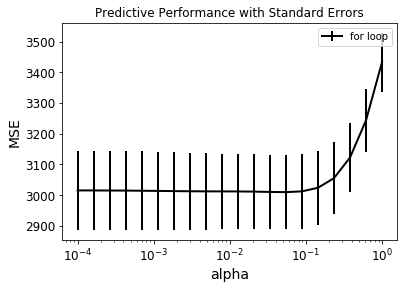

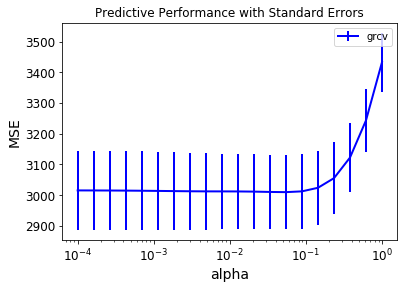

In [24]:
fig=plt.figure(figsize=[6,4])
plt.errorbar(alphas,np.mean(mse_valid,axis=0),np.std(mse_valid,axis=0)/np.sqrt(n_folds),color='k',lw=2,ms=8,label='for loop')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Predictive Performance with Standard Errors')
plt.show()
fig=plt.figure(figsize=[6,4])
plt.errorbar(alphas,-gscv.cv_results_['mean_test_score'],gscv.cv_results_['std_test_score']/np.sqrt(n_folds),color='b',lw=2,ms=8,label='grcv')
plt.xscale('log')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Predictive Performance with Standard Errors')
plt.show()

## Clustering

### Load in MNIST for a visual example:
Visual examples allow us to use our intuition about visual objects to make sense of what is going on.

In [25]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X=X/255. # normalize to 1 for convienence

In [26]:
from sklearn import model_selection
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,y)

### Apply k-means to this data
We are going to apply k-means to this dataset.

This dataset is large so we are going to use "MiniBatchKMeans" rather than "KMeans."  The only difference between these algorithms it how they are optimized, but the goals are the same.

In [27]:
from sklearn import cluster

In [28]:
k=10
kmeans=cluster.MiniBatchKMeans(n_clusters=k,max_iter=100)
kmeans.fit(X_train)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

#### Pull out and visualize centers
We have applied k-means to the training dataset, so now we want to visualize what each cluster looks like.

First, we want to pull out the cluster means from the dataset object.

In [29]:
centers=kmeans.cluster_centers_
centers.shape

(10, 784)

There's a couple of complicated lines of code here to make a pretty visualization.  These are just plotting commands.

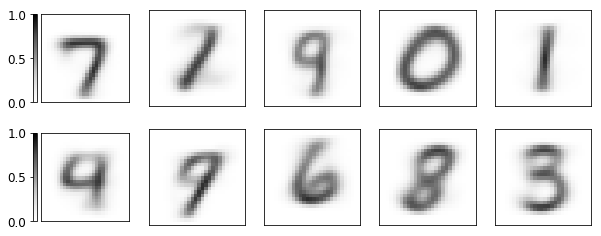

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[10,4])
for i,center in enumerate(centers):
    ax=plt.subplot(2,5,i+1)
    image = np.reshape(center,[28,28])
    im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_k10')

#### with K=15
This is the exact same analysis with K=15

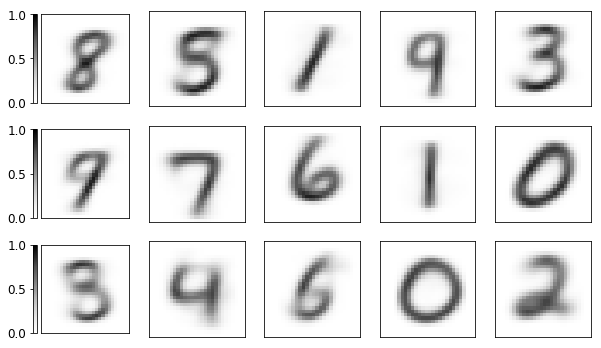

In [31]:
k=15
kmeans=cluster.MiniBatchKMeans(n_clusters=k)
kmeans.fit(X_train)
centers=kmeans.cluster_centers_
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[10,6])
for i,center in enumerate(centers):
    ax=plt.subplot(3,5,i+1)
    image = np.reshape(center,[28,28])
    im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_k15')

#### with k=20

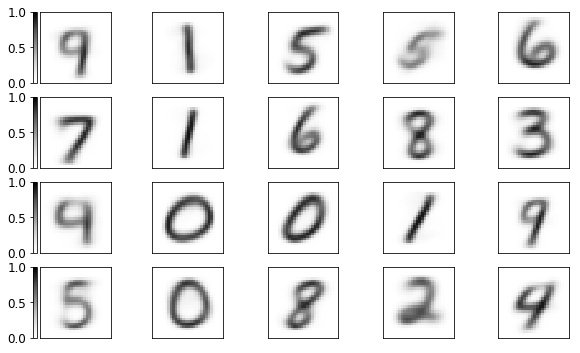

In [32]:
k=20
kmeans=cluster.MiniBatchKMeans(n_clusters=k)
kmeans.fit(X_train)
centers=kmeans.cluster_centers_
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[10,6])
for i,center in enumerate(centers):
    ax=plt.subplot(4,5,i+1)
    image = np.reshape(center,[28,28])
    im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_k20')

#### with k=40

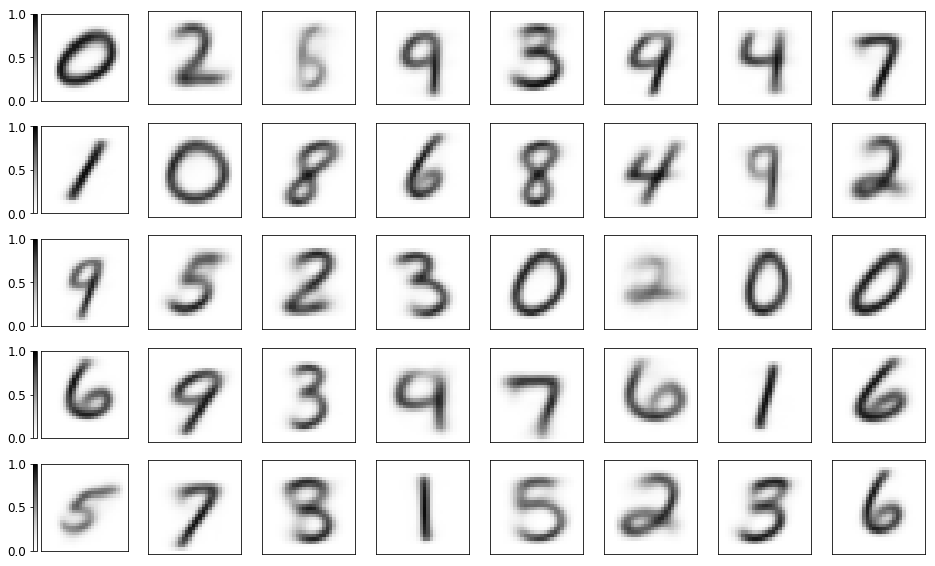

In [33]:
k=40
kmeans=cluster.MiniBatchKMeans(n_clusters=k,max_iter=500)
kmeans.fit(X_train)
centers=kmeans.cluster_centers_
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[16,10])
for i,center in enumerate(centers):
    ax=plt.subplot(5,8,i+1)
    image = np.reshape(center,[28,28])
    im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
    plt.xticks([])
    plt.yticks([])
    if (i%8)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_k40')

## Let's apply a decomposition to this dataset to make sense of it.
First, we are going to apply the famous PCA algorithm to understand what is happening here.

In [34]:
from sklearn import decomposition

Fitting PCA on the training dataset:

In [35]:
pca=decomposition.PCA(n_components=15)
pca.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Again, we want to visualize what our components look like.  We do that to visualize the top components with the code below

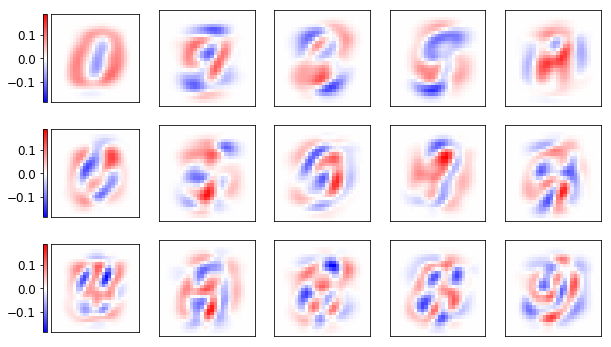

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[10,6])
components=pca.components_
maxabs=np.max(np.abs(components[:15]))
for i,component in enumerate(components):
    if i>=15:
        continue
    ax=plt.subplot(3,5,i+1)
    image = np.reshape(component,[28,28])
    im=ax.imshow(image, cmap='bwr',vmin=-maxabs,vmax=maxabs)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_pca')

How much orginal variance does this decomposition keep?

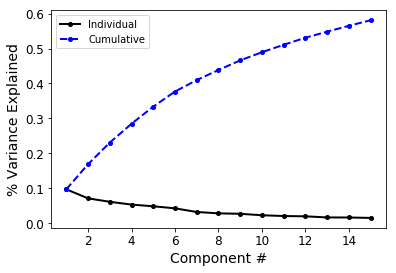

In [37]:
fig=plt.figure(figsize=[6,4])
plt.plot(np.arange(1,16),pca.explained_variance_ratio_[:15],'k.-',lw=2,ms=8,label='Individual')
plt.plot(np.arange(1,16),np.cumsum(pca.explained_variance_ratio_[:15]),'b.--',lw=2,ms=8, label='Cumulative')
plt.legend()
plt.xlabel('Component #')
plt.ylabel('% Variance Explained')
savepdf(fig,'pca_variance_explained')

How well does this represent the data?

To understand this question, we can try to understand this visually.

In [38]:
pca.transform(X_train[i].reshape(1,-1))

array([[-1.70333896,  1.15249   , -1.13272319,  0.10563215,  0.45931687,
        -0.34370295,  0.6860374 , -0.74444166,  0.31527512, -0.85648461,
         1.47128229,  2.96324999, -1.28005193,  0.72571336,  0.66678173]])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

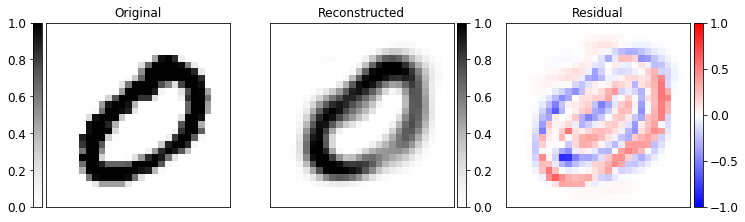

In [39]:
# first choosing a random data example:
i=21
x=X_train[i]

# Map to the PCA space
print('The pca scores are {}'.format(pca.transform(x.reshape(1,-1))))
# Show the original image
fig=plt.figure(figsize=[12,5])
ax=plt.subplot(1,3,1)
image = np.reshape(x,[28,28])
im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
plt.title('Original')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
# Project to PCA and back to get the reconstruction
ax=plt.subplot(1,3,2)
image = np.reshape(pca.inverse_transform(pca.transform(x.reshape(1,-1))),[28,28])
im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
plt.title('Reconstructed')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
h=plt.colorbar(im,cax=cax,orientation='vertical')
# Project to PCA and back to get the residual
ax=plt.subplot(1,3,3)
image = np.reshape(x-pca.inverse_transform(pca.transform(x.reshape(1,-1))),[28,28])
im=ax.imshow(image, cmap='bwr',vmin=-1,vmax=1)
plt.title('Residual')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')

## Visualizing an NMF decomposition

This is very similar to the PCA approach above, but we are going to use Non-Negative Matrix Factorizaiton (nmf) instead.

In [40]:
nmf=decomposition.NMF(n_components=15,l1_ratio=0,alpha=.1)
nmf.fit(X_train,y_train)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0, max_iter=200,
  n_components=15, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

Again, we visualize the learned features

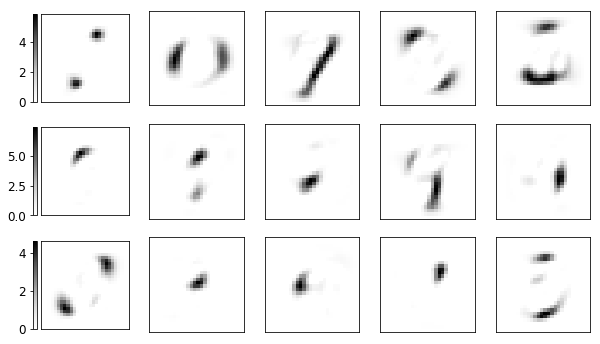

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig=plt.figure(figsize=[10,8])
components=nmf.components_
for i,component in enumerate(components):
    if i>=15:
        continue
    ax=plt.subplot(4,5,i+1)
    image = np.reshape(component,[28,28])
    maxabs=np.max(np.abs(component))
    im=ax.imshow(image, cmap='Greys',vmin=0,vmax=maxabs)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()
savepdf(fig,'mnist_nmf')

How well does this reconstruct?

The nmf scores are [[0.11524293 0.25052967 0.         0.         0.         0.
  0.17839296 0.         0.         0.00860471 0.21482877 0.
  0.09701154 0.02067956 0.09897541]]


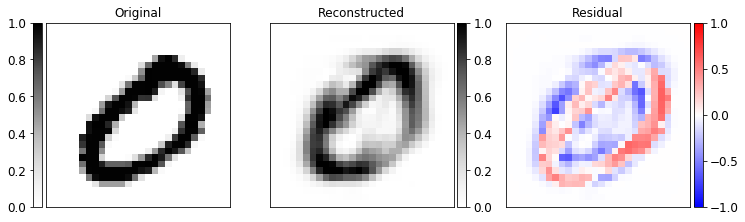

In [42]:
# first choosing a random data example:
i=21
x=X_train[i]
# Map to the PCA space
print('The nmf scores are {}'.format(nmf.transform(x.reshape(1,-1))))
# Show the original image
fig=plt.figure(figsize=[12,5])
ax=plt.subplot(1,3,1)
image = np.reshape(x,[28,28])
im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
plt.title('Original')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
# Project to PCA and back to get the reconstruction
ax=plt.subplot(1,3,2)
image = np.reshape(nmf.inverse_transform(nmf.transform(x.reshape(1,-1))),[28,28])
im=ax.imshow(image, cmap='Greys',vmin=0,vmax=1)
plt.title('Reconstructed')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
h=plt.colorbar(im,cax=cax,orientation='vertical')
# Project to PCA and back to get the residual
ax=plt.subplot(1,3,3)
image = np.reshape(x-nmf.inverse_transform(nmf.transform(x.reshape(1,-1))),[28,28])
im=ax.imshow(image, cmap='bwr',vmin=-1,vmax=1)
plt.title('Residual')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')

## Looking at text analysis.

We're going to load in our 20 newsgroups dataset.

In [43]:
from sklearn.datasets import fetch_20newsgroups

In [44]:
n_samples = 5000 # Limit to a smaller set of documents for speed
n_features = 1000 # how many vocabulary words to keep.

In [45]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
# we're limiting the dataset to a subset for now to make things simpler
data_samples = dataset.data[:n_samples] 
targets = dataset.target[:n_samples]

In [46]:
print(data_samples[4242])

I am looking for recommendations/experiences of bringing Macintosh CPUs
onto Token-Ring Nets. Can someone point me in the right direction for
information. 


We need to preprocess all of these words into a set of feature vectors.  Here we will use the td-idf vectorization method, which was used in the text lecture.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

Next we want to apply our decomposition methods to these vectors, and build up a "topic model":

In [48]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
n_components = 10 # number of topics to learn
n_top_words = 20 # number of top words to visualize

Apply a NMF to the data.

In [49]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
nmf.fit(tfidf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

What does each topic describe?

In [50]:
# helper function for visualization.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " {},".format([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        message +="\b"
        print(message)
    print()

In [51]:
print("\nTopics in NMF model (Euclidean norm observation model):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Euclidean norm observation model):
Topic #0:  ['people', 'don', 'think', 'like', 'good', 'time', 'know', 'right', 've', 'make', 'did', 'way', 'really', 'say', 'years', 'want', 'll', 'going', 'new', 'said'],
Topic #1:  ['thanks', 'does', 'know', 'mail', 'advance', 'hi', 'anybody', 'info', 'looking', 'email', 'interested', 'information', 'help', 'appreciated', 'post', 'reply', 'like', 'need', 'send', 'com'],
Topic #2:  ['god', 'jesus', 'bible', 'faith', 'christians', 'christ', 'christian', 'believe', 'lord', 'church', 'does', 'life', 'love', 'son', 'father', 'true', 'hell', 'say', 'spirit', 'atheism'],
Topic #3:  ['key', 'chip', 'keys', 'encryption', 'clipper', 'government', 'escrow', 'law', 'public', 'use', 'enforcement', 'security', 'algorithm', 'data', 'nsa', 'phone', 'bit', 'secure', 'chips', 'privacy'],
Topic #4:  ['00', 'sale', '10', 'new', 'shipping', '20', 'price', '50', '15', 'offer', '25', 'condition', '12', '30', '40', '11', 'asking', '17', '18', 'inc

What does our previous document belong to?

In [52]:
nmf.transform(tfidf[4242])

array([[0.01990484, 0.021892  , 0.        , 0.00238221, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Many types of topic models exist.  This is the famous Latent Dirichlet Allocation method.

In [53]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [54]:
print("\nTopics in LDA model (Multinomial observation model):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tfidf_feature_names, n_top_words)


Topics in LDA model (Multinomial observation model):
Topic #0:  ['gm', 'vs', 'john', 'win', 'americans', 'ok', 'home', 'cd', 'll', 'building', 'gov', 'game', 'library', 'red', 'clipper', 'st', 'san', '1st', 'chip', 'product'],
Topic #1:  ['edu', 'soon', 'jewish', 'cases', 'john', 'reply', 'david', 'end', 'james', 'dave', 'article', 'blood', 'home', 'secret', 'little', 'useful', 'usually', 'kill', 'term', 'wanted'],
Topic #2:  ['00', '11', '10', '12', '20', '15', '23', '26', '28', '13', '21', '18', '14', '17', '25', '1st', '27', '19', '16', 'period'],
Topic #3:  ['dr', 'talking', 'language', 'sorry', 'used', 'key', 'keys', 'keyboard', 'david', 'worth', 'hear', 'clinton', 'does', 'like', 'ago', 'years', 'car', 'know', 'weapons', 'really'],
Topic #4:  ['couldn', 'does', 'interested', 'mail', 'thanks', 'means', 'certainly', 'mean', 'anybody', 'info', 'll', 'advance', 'learn', 'nice', 'bike', 'win', 'court', 'questions', 'systems', 'edu'],
Topic #5:  ['deleted', 'stuff', 'hiv', 'messa

In [55]:
What does our document look like?

Object `like` not found.


In [ ]:
What does our document look like

What does our document look like

What does our document look like

In [56]:
lda.transform(tfidf[4242])

array([[0.03339131, 0.03339131, 0.03339131, 0.03339131, 0.03339131,
        0.03339131, 0.03339131, 0.03339131, 0.03340614, 0.69946341]])

## Combining clustering with dimensionality reduction.

In [57]:
kmeans=cluster.MiniBatchKMeans(n_clusters=40)
kmeans.fit(nmf.transform(tfidf))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=40,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

Does this learn the natural groupings?

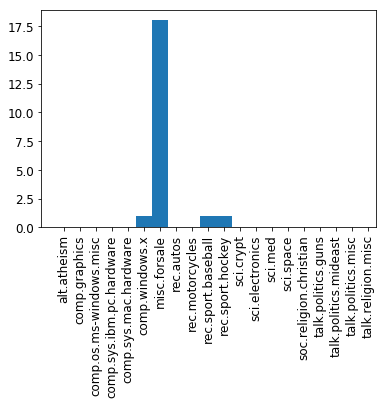

In [58]:
# Load in a single cluster and look at its composition.
groups=kmeans.labels_
data_ndx=groups==1
targets_in_group=targets[data_ndx]
axes = plt.figure().add_subplot(111)
plt.hist(targets_in_group,range(0,20))
plt.xticks(rotation=90)
#axes.set_xticks(np.arange(-.5,19.5,1))
axes.set_xticks(np.arange(.5,20.5,1))
axes.set_xticklabels(dataset.target_names)
plt.show()

#### Some advanced visualization things that we'll eventually get to:

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne=TSNE(n_components=2,n_iter=1000)
S=tsne.fit_transform(nmf.transform(tfidf))

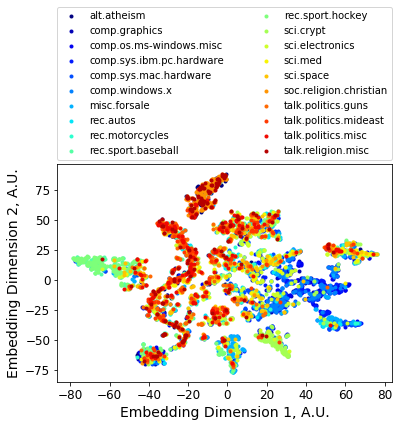

In [61]:
fig=plt.figure()
targets=dataset.target[:n_samples]
ax = plt.subplot(111)
for i in range(0,20):
    plt.plot(S[targets==i, 0], S[targets==i, 1],\
             '.',color=plt.cm.jet(i / 20.),label=dataset.target_names[i])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Embedding Dimension 1, A.U.')
plt.ylabel('Embedding Dimension 2, A.U.')
plt.show()